# COVID-19: Raw Material Impact in the Coating Industry in Ecuador
by Rafael G Fernandez

---
Hypotesis:

In March 2020, Covid-19 cases began to be detected throughout the South American region. One of most affected countries by this lethal virus was Ecuador. Based on the knowledge we have in the Coating Industry, I think that the impact of Covid in Ecuador would be negative in reference to the imports of raw materials for the coating sector.

Using the import records of three companies that represent 80% of the total sales of finished products, I have performed the following analysis to determine if this hypothesis can be verified.


---

## Dependencies and setup 

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## Reading files and store into Pandas data frame

In [4]:

file_one_df = pd.read_excel("Pinturas_Condor.xlsx")
file_two_df = pd.read_excel("Pinturas_Ecuatorianas.xlsx")
file_three_df= pd.read_excel("Pinturas_Unidas.xlsx")
covid_data_df=pd.read_csv("covid-data.csv")


## Reviewing the first custom declaration 

In [5]:
file_one_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Cargo Type,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem
0,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,144,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,..., ,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0
1,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,145,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,..., ,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0
2,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,118,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,..., ,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0
3,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,117,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,..., ,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0
4,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00728681,0,27,2020-10-19,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,..., ,2220,NUEVA,1,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0


## Reviewing the second custom declaration 

In [6]:
file_two_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Cargo Type,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem
0,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00008131,0,1,2020-01-03,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÃ‘IA MINERA AGREGADOS CALCAREOS S A,..., ,2880,NUEVA,0,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0
1,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00060859,0,1,2020-01-23,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,QCI BRITANNIC,..., ,20,NUEVA,0,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,NEOGEN 2000 MATERIA PRIMA SIN MARCA 25000000564,SIN MARCA,25000000564, ,0.0
2,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00060120,0,1,2020-01-23,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÑIA MINERA AGREGADOS CALCAREOS S.A.,..., ,2880,NUEVA,3,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0
3,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00085844,0,1,2020-01-31,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,COMPAÑIA MINERA AGREGADOS CALCAREOS S.A.,..., ,2880,NUEVA,3,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,CAOLIN PZ-600 MATERIA PRIMA COMACSA PZ-600,COMACSA,PZ-600, ,0.0
4,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00131399,0,1,2020-02-19,990034958001,PINTURAS ECUATORIANAS S.A. PINTUCO,KAMIN LLC,..., ,480,NUEVA,1,TORRES & TORRES AGENTES DE ADUANAS TTADAD C.A.,KAMIN MATERIA PRIMA KAMIN SIN MODELO,KAMIN,SIN MODELO, ,0.0


## Reviewing the third custom declaration 

In [7]:
file_three_df.head()

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Cargo Type,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem
0,2505100000,ARENAS SILICEOUS AND QUARTZ SANDS,GQUIL - MARITIMO,028-2020-10-00250190,0,5,2020-04-17,990000689001,PINTURAS UNIDAS S.A.,ANDES CHEMICAL CORP,..., ,640,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,IMSIL SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0
1,2505100000,ARENAS SILICEOUS AND QUARTZ SANDS,GQUIL - MARITIMO,028-2020-10-00711279,0,5,2020-10-12,990000689001,PINTURAS UNIDAS S.A.,ANDES CHEMICAL CORP,..., ,555,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,IMSIL SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0
2,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00839830,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,..., ,88,NUEVA,2,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0
3,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00839600,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,..., ,1890,NUEVA,2,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0
4,2507001000,KAOLIN. WHETHER OR NOT CALCINED,GQUIL - MARITIMO,028-2020-10-00840889,0,1,2020-11-25,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,..., ,1020,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,SANTINTONE SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0


## Data Analysis of Covid- 19 cases worldwide

In [8]:
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


## Creating data frames and preparing to merge

In [9]:
file_one_df['Company'] = 'Condor'
file_two_df['Company'] = 'Ecuatorianas'
file_three_df['Company'] = 'Unidas'


## Merging data frames into a single dataset

In [10]:
imports_df = pd.concat([file_one_df, file_two_df], axis=0)
imports_df = pd.concat([imports_df, file_three_df], axis=0)

## Reviewing merged data

In [11]:
imports_df

,HTS Code,HTS Code Description,Custom District,Custom Reg Nr 1,Custom Reg Nr 2,Custom Reg Nr 3,Date,Tax Id,Importer,Exporter,...,Nr. Packs,New - Used,Container Number,Custom Agent,Commercial Description,Brand,Model,Bank,Advalorem,Company
0,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,144,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor
1,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00252890,0,145,2020-04-20,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND.COM. LTDA,...,13520,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor
2,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,118,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO ALTO SOLID SIN MARCA 807980...,SIN MARCA,807980412 054, ,0.0,Condor
3,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00440431,0,117,2020-07-07,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,11450,NUEVA,3,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor
4,8310000000,"PLATES INDICATOR, NAMEPLATES, ADDRESS PLATES A...",GQUIL - MARITIMO,028-2020-10-00728681,0,27,2020-10-19,1790013561001,PINTURAS CONDOR SA,SHERWIN WILLIAMS DO BRASIL IND COM LTDA DIV AU...,...,2220,NUEVA,1,ALAIRE CIA. LTDA.,ESCALA EM ALUMINIO TRADICIONA SIN MARCA 807980...,SIN MARCA,807980376 054, ,0.0,Condor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00270158,0,2,2020-04-28,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,404,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX Z PLEX SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
681,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00494534,0,1,2020-07-28,990000689001,PINTURAS UNIDAS S.A.,PRODUCCIONES QUIMICAS S.A.,...,20,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,ESTEARATO DE ZINC SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
682,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00066992,0,1,2020-01-27,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,404,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX FLASH X 150 SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas
683,3824999999,OTHER BINDING PREPARATIONS FOR MOLDS OR FOUNDI...,GQUIL - MARITIMO,028-2020-10-00066992,0,2,2020-01-27,990000689001,PINTURAS UNIDAS S.A.,LORAMA GROUP INTERNATIONAL INC,...,404,NUEVA,1,PRIETO VEGA LAURA MACLOVIA,HALOX Z PLEX 111 SIN MARCA SIN MODELO,SIN MARCA,SIN MODELO, ,0.0,Unidas


## Converting Date into weeks

In [12]:
imports_df['Date']=pd.to_datetime(imports_df['Date'])
imports_df['Week']=imports_df['Date'].dt.week
imports_df.groupby('Week')['Qty'].sum()
imports_df.groupby('Week')['U$ CFR Tot'].sum()

Week
1      278603.79
2      828032.09
3     1790706.01
4     1232525.32
5      680801.81
6     1084362.23
7      940039.59
8      662626.64
9     1063623.29
10     606629.07
11     762201.09
12      93297.74
13     420176.54
14     260001.54
15     743669.02
16     510526.46
17     649186.84
18     866686.49
19     351963.75
20    1032492.22
21     904051.98
22     290316.57
23     316817.80
24     183464.46
25     260033.77
26     144223.20
27      40864.14
28     636505.65
29     359062.88
30     126194.89
31     516184.01
32     569779.96
33     281248.20
34     340252.85
35     491506.80
36     620301.21
37     778747.93
38    1268366.78
39     510433.64
40    1022173.97
41     945604.34
42     965132.53
43    1510868.71
44     630831.66
45     922643.70
46    1867898.03
47     639215.90
48     997428.81
49     812118.63
50     934963.78
51    1521771.57
52     807929.11
53     714922.21
Name: U$ CFR Tot, dtype: float64

## Preparing a new data frame to merge with Covid-19 data


In [13]:
total_imports_df=imports_df.groupby('Week',as_index=False)[['U$ CFR Tot','Qty']].sum()

## Reviewing information

In [14]:
total_imports_df

,Week,U$ CFR Tot,Qty
0,1,278603.79,214535.03
1,2,828032.09,577859.31
2,3,1790706.01,1221904.03
3,4,1232525.32,1142984.30
4,5,680801.81,604874.89
5,6,1084362.23,630612.93
6,7,940039.59,539875.66
7,8,662626.64,537196.45
8,9,1063623.29,542044.13
9,10,606629.07,444577.04


## Extracting Ecuador's Data from Covid -19 worldwide cases

In [15]:
covid_data_df[covid_data_df['location']=='Ecuador']
total_covid_df = covid_data_df[covid_data_df['location']=='Ecuador']
total_covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
17725,ECU,South America,Ecuador,3/1/2020,6.0,6.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17726,ECU,South America,Ecuador,3/2/2020,6.0,0.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17727,ECU,South America,Ecuador,3/3/2020,7.0,1.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17728,ECU,South America,Ecuador,3/4/2020,10.0,3.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
17729,ECU,South America,Ecuador,3/5/2020,13.0,3.0,NaN,NaN,NaN,NaN,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18062,ECU,South America,Ecuador,2/1/2021,250986.0,158.0,1345.571,14890.0,31.0,35.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18063,ECU,South America,Ecuador,2/2/2021,251279.0,293.0,1304.714,14915.0,25.0,35.286,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18064,ECU,South America,Ecuador,2/3/2021,252390.0,1111.0,1265.000,14949.0,34.0,35.000,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752
18065,ECU,South America,Ecuador,2/4/2021,253339.0,949.0,1048.429,14968.0,19.0,28.857,...,10581.936,3.6,140.448,5.55,2.0,12.3,80.635,1.5,77.01,0.752


## Converting Ecuador's covid -19 data into weeks

In [16]:
covid_data_df['date']=pd.to_datetime(covid_data_df['date'])
covid_data_df['date'].max()

Timestamp('2021-02-05 00:00:00')

In [17]:
covid_data_df['date'].max()

Timestamp('2021-02-05 00:00:00')

## Collecting new cases information for year 2020


In [18]:
covid_data_df['date']=pd.to_datetime(covid_data_df['date'])
covid_data_df['Week']=covid_data_df['date'].dt.week
covid_data_df['Year']=covid_data_df['date'].dt.year

# only 2020 
covid_data_df = covid_data_df[covid_data_df["Year"] == 2020]

# only Ecuador
covid_data_df = covid_data_df[covid_data_df["location"] == "Ecuador"]


# covid_data_df.head(20)
# covid_data_df.groupby('Week')['new_cases'].sum()

total_covid_df=covid_data_df.groupby('Week',as_index=False)[['new_cases']].sum()
total_covid_df.head(53)

,Week,new_cases
0,9,6.0
1,10,8.0
2,11,14.0
3,12,761.0
4,13,1135.0
5,14,1722.0
6,15,3820.0
7,16,2002.0
8,17,13251.0
9,18,6819.0


## Merging custom information with Covid-19 cases 

In [19]:
#total_unified_df 

# total_imports_df.merge(total_covid_df, how="outer", on='Week')

total_unified_df=pd.merge(
    total_imports_df,
    total_covid_df,
    how="outer",
    on="Week"
)

total_unified_df = total_unified_df.fillna(0)
total_unified_df.head(20)

,Week,U$ CFR Tot,Qty,new_cases
0,1,278603.79,214535.03,0.0
1,2,828032.09,577859.31,0.0
2,3,1790706.01,1221904.03,0.0
3,4,1232525.32,1142984.30,0.0
4,5,680801.81,604874.89,0.0
5,6,1084362.23,630612.93,0.0
6,7,940039.59,539875.66,0.0
7,8,662626.64,537196.45,0.0
8,9,1063623.29,542044.13,6.0
9,10,606629.07,444577.04,8.0


---
---

## Covid cases analysis

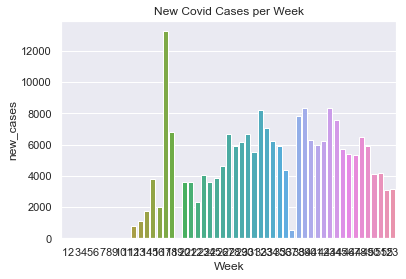

In [20]:
# cases per week
sns.barplot(x=total_unified_df["Week"], y=total_unified_df["new_cases"])

pd.set_option('max_columns', 52) 
pd.set_option('max_rows', 10)
sns.set(style="ticks")
plt.title('New Covid Cases per Week');

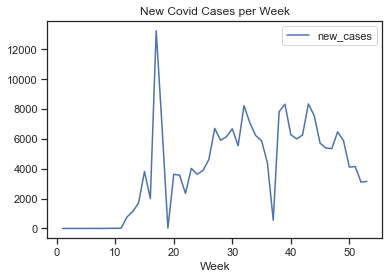

In [21]:
total_unified_df.plot.line(x='Week', y='new_cases')
plt.title('New Covid Cases per Week');

**Insights:**
- Previous charts demostrate that Covid-19 cases had the biggest increment in Ecuador by the 17 week of 2020 ( Between April 20 and April 26)

## Total imports (USD) analysis

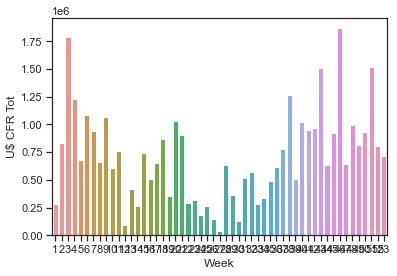

In [22]:
sns.barplot(x=total_unified_df["Week"], y=total_unified_df["U$ CFR Tot"]);


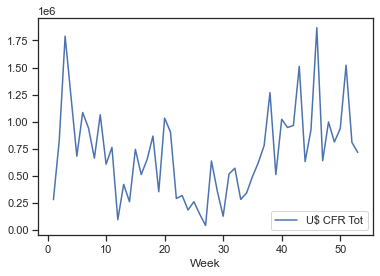

In [23]:
total_unified_df.plot.line(x='Week', y='U$ CFR Tot');

**Insights:**
- We can observe that the lowest importation values in USD were obtained during the 27 week of 2020 (June 29th and July 5th)

## Total imports Qty (Kgs) analysis

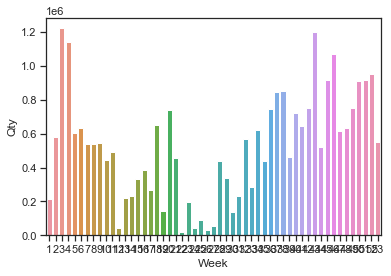

In [24]:
sns.barplot(x=total_unified_df["Week"], y=total_unified_df["Qty"]);

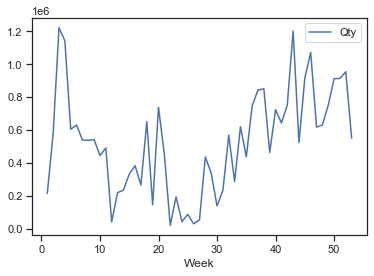

In [25]:
total_unified_df.plot.line(x='Week', y='Qty');


**Insights:** 
- We can observe that the amount of raw material arriving to the port maintains a correlation with the value in USD 

## Total vs Qty

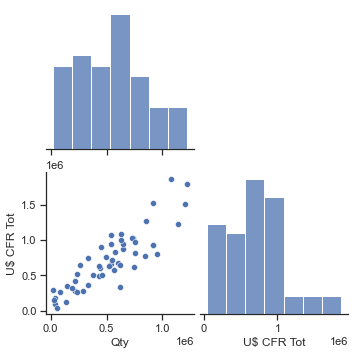

In [26]:
sns.pairplot(total_unified_df[["Qty", "U$ CFR Tot"]], corner=True);

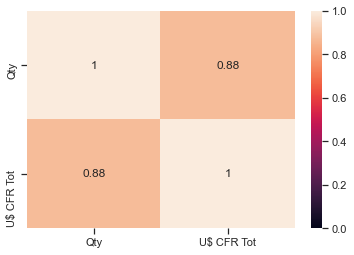

In [27]:
sns.heatmap(
    total_unified_df[["Qty", "U$ CFR Tot"]].corr(),
    annot=True,
    vmin=0,
    vmax=1
);

**Insights:**

- As we can observe the Pairplot Graph and the Heatmap Graphs demostrate the correlation between the Amount of Raw Materials arriving to the port and their Value in USD, prices were consistent during the worse period of the pandemia.

## Cases vs Total

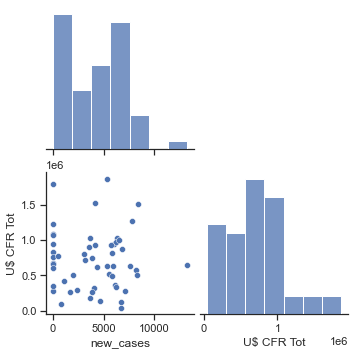

In [28]:
sns.pairplot(total_unified_df[["new_cases", "U$ CFR Tot"]], corner=True);

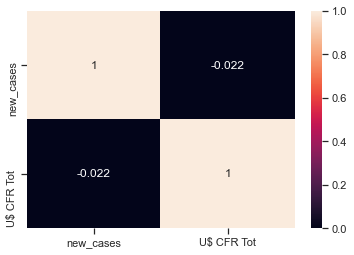

In [29]:
sns.heatmap(
    total_unified_df[["new_cases", "U$ CFR Tot"]].corr(),
    annot=True,
    vmin=0,
    vmax=1
);

Text(0.5, 1.0, 'Covid-19 Cases vs USD Total Imports in Ecuador ')

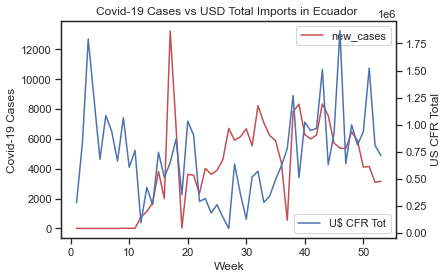

In [30]:
fig,ax = plt.subplots()
total_unified_df.plot.line(x='Week', y='new_cases',ax=ax,c='r')
ax2=plt.twinx()
total_unified_df.plot.line(x='Week', y='U$ CFR Tot',ax=ax2)
ax.set_ylabel("Covid-19 Cases")
ax2.set_ylabel("US CFR Total")
plt.title("Covid-19 Cases vs USD Total Imports in Ecuador ")

**Insights:**
- On the Pairplot Chart and Heatmap Chart we can observe that there is not correlation between New Covid-19 Cases and Total Import of Raw Materials for the Coating Industry. 
- On the Mix Plot Line Chart we can observe that even during the highest peak of Covid -19 cases, still the value in USD for the importation of raw material seems to be increasing and going along the curve at some points. 


## Cases vs Qty

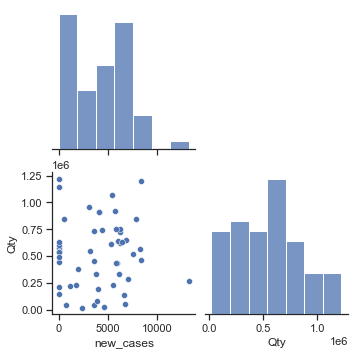

In [31]:
sns.pairplot(total_unified_df[["new_cases", "Qty"]], corner=True);

<AxesSubplot:>

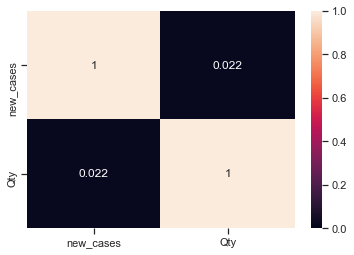

In [32]:
sns.heatmap(
    total_unified_df[["new_cases", "Qty"]].corr(),
    annot=True,
    vmin=0,
    vmax=1
)

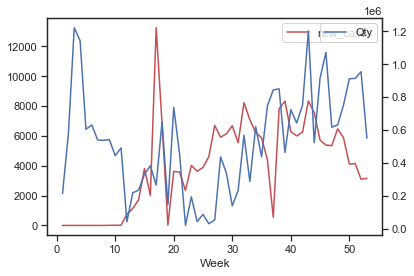

In [33]:
fig,ax = plt.subplots()
total_unified_df.plot.line(x='Week', y='new_cases',ax=ax,c='r')
ax2=plt.twinx()
total_unified_df.plot.line(x='Week', y='Qty',ax=ax2);


**Insights:**
- On the Pairplot Chart and Heatmap Chart we can observe that there is not correlation between New Covid-19 Cases and Amount of  of Raw Materials for the Coating Industry. 
- On the Mix Plot Line Chart we can observe that even during the highest peak of Covid -19 cases, still importation of raw material seems to be increasing and going along the curve. The Value in USD and Amount of Raw Material is consistent. 

## Summary:

Analyzing the information we have obtained from the data record from customs office in Ecuador and World Data Record Case by countries affected by COVID-19, we can see the following:

- The highest peak of Coviod-19 in Ecuador ocurred between April 20th and April 26th of 2020, however that the lowest importation values in USD were obtained during June 29th and July 5th. 

- The period of time between April 20th and June 29th is equivalent to 10 weeks.

- We can observe that the amount of raw material in Kg arriving to the port maintains a correlation with the value in USD even at the highest peak of the pandemia.

- The biggest volume of product in USD and Kg that arrives to the country is arriving from Colombia and the USA, so we can not use the transit time as an argument to justify a delay or slow down period. From the USA to Ecuador there is a transit time of 8 days. Colombia and Ecuador share borders and Transit time between the two countries is between two to four days.

In conclusion I could not find a correlation between New Covid-19 Cases and Amount of Raw Materials imported in Kg or USD for the Coating Industry. Seeing the results of these graphs,is possible to say that having people in quarantine or working from their homes has motivated the population to make repairs and paint the place where they work or live, so the impact of Covid-19 over the Coating Industry is not noticeable.

